Rolling horizon with bidding prices for storages
Analyse the solved network from pypsa-eur model

scenario:
  simpl: ['']
  ll: ['v1.0']
  clusters: [40]
  opts: [Co2L0p0-3H]
  storage_bidding: "H2-hydro-PHS-battery" #"all", "H2-hydro", "H2-hydro-PHS"


window: 14 #days for each simulation
overlap: 7 #days of overlap for consecutive simulations

countries: ['AL', 'AT', 'BA', 'BE', 'BG', 'CH', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'ME', 'MK', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK']
energy_year: "2013"

conventional_carriers: [OCGT, CCGT, biomass, geothermal]
renewable_capacities_from_OPSD: [onwind, offwind, solar]

In [32]:
import pypsa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline
from pypsa.linopf import (get_var, define_constraints, linexpr, join_exprs,
                          network_lopf, ilopf)

In [33]:
#basedir = "../" 
basedir = "~/mnt/lin/pypsa-eur/"

In [34]:
# Perfect foresight:  sovled network
n2013 = pypsa.Network(basedir + "networks/2013/elec_s_40_ec_lv1.0_Co2L0p0-3H.nc")

/Users/linyang/opt/anaconda3/envs/pypsa-eur-sp/lib/python3.7/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_40_ec_lv1.0_Co2L0p0-3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [7]:
# Perfect foresight:  sovled network
n_solved = pypsa.Network(basedir + "results/networks/2013/elec_s_40_ec_lv1.0_Co2L0p0-3H.nc")

/Users/linyang/opt/anaconda3/envs/pypsa-eur-sp/lib/python3.7/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/Users/linyang/opt/anaconda3/envs/pypsa-eur-sp/lib/python3.7/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_40_ec_lv1.0_Co2L0p0-3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [8]:
# Perfect foresight:  sovled operation network
n_op = pypsa.Network(basedir + "results/networks/2013/elec_s_40_ec_lv1.0_Co2L0p0-3H_op.nc")

/Users/linyang/opt/anaconda3/envs/pypsa-eur-sp/lib/python3.7/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/Users/linyang/opt/anaconda3/envs/pypsa-eur-sp/lib/python3.7/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_40_ec_lv1.0_Co2L0p0-3H_op.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [9]:
# rolling horizon, without setting bidding price
n_rh = pypsa.Network(basedir + "results/networks/2013/elec_s_40_ec_lv1.0_Co2L0p0-3H__rh.nc")

/Users/linyang/opt/anaconda3/envs/pypsa-eur-sp/lib/python3.7/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/Users/linyang/opt/anaconda3/envs/pypsa-eur-sp/lib/python3.7/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_40_ec_lv1.0_Co2L0p0-3H__rh.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [10]:
# rolling horizon for each snapshot
n_rh_sp_3h = pypsa.Network(basedir + "results/networks/2013/elec_s_40_ec_lv1.0_Co2L0p0-3H_all_rh_3h.nc")

/Users/linyang/opt/anaconda3/envs/pypsa-eur-sp/lib/python3.7/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/Users/linyang/opt/anaconda3/envs/pypsa-eur-sp/lib/python3.7/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_40_ec_lv1.0_Co2L0p0-3H_all_rh_3h.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [11]:
## rolling horizon for two weeks and one week overlap
n_rh_H2_2w = pypsa.Network(basedir + "results/networks/2013/elec_s_40_ec_lv1.0_Co2L0p0-3H_H2_rh.nc")

/Users/linyang/opt/anaconda3/envs/pypsa-eur-sp/lib/python3.7/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/Users/linyang/opt/anaconda3/envs/pypsa-eur-sp/lib/python3.7/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_40_ec_lv1.0_Co2L0p0-3H_H2_rh.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [12]:
## rolling horizon for two weeks and one week overlap, with bidding price for all stores
n_rh_all_2w = pypsa.Network(basedir + "results/networks/2013/elec_s_40_ec_lv1.0_Co2L0p0-3H_all_rh.nc")

/Users/linyang/opt/anaconda3/envs/pypsa-eur-sp/lib/python3.7/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/Users/linyang/opt/anaconda3/envs/pypsa-eur-sp/lib/python3.7/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_40_ec_lv1.0_Co2L0p0-3H_all_rh.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [23]:
## rolling horizon for two weeks and one week overlap, fixed bidding price
n_rh_H2andhydro_2w = pypsa.Network(basedir + "results/networks/2013/elec_s_40_ec_lv1.0_Co2L0p0-3H_H2-hydro_rh.nc")

/Users/linyang/opt/anaconda3/envs/pypsa-eur-sp/lib/python3.7/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/Users/linyang/opt/anaconda3/envs/pypsa-eur-sp/lib/python3.7/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_40_ec_lv1.0_Co2L0p0-3H_H2-hydro_rh.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [13]:
## rolling horizon for two weeks and one week overlap, fixed bidding price
n_rh_H2andhydro_2w_fixed_bidding = pypsa.Network(basedir + "results/networks/2013/fixed_price/elec_s_40_ec_lv1.0_Co2L0p0-3H_H2-hydro_rh.nc")

/Users/linyang/opt/anaconda3/envs/pypsa-eur-sp/lib/python3.7/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/Users/linyang/opt/anaconda3/envs/pypsa-eur-sp/lib/python3.7/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_40_ec_lv1.0_Co2L0p0-3H_H2-hydro_rh.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


Text(0.5, 0, 'state of charge')

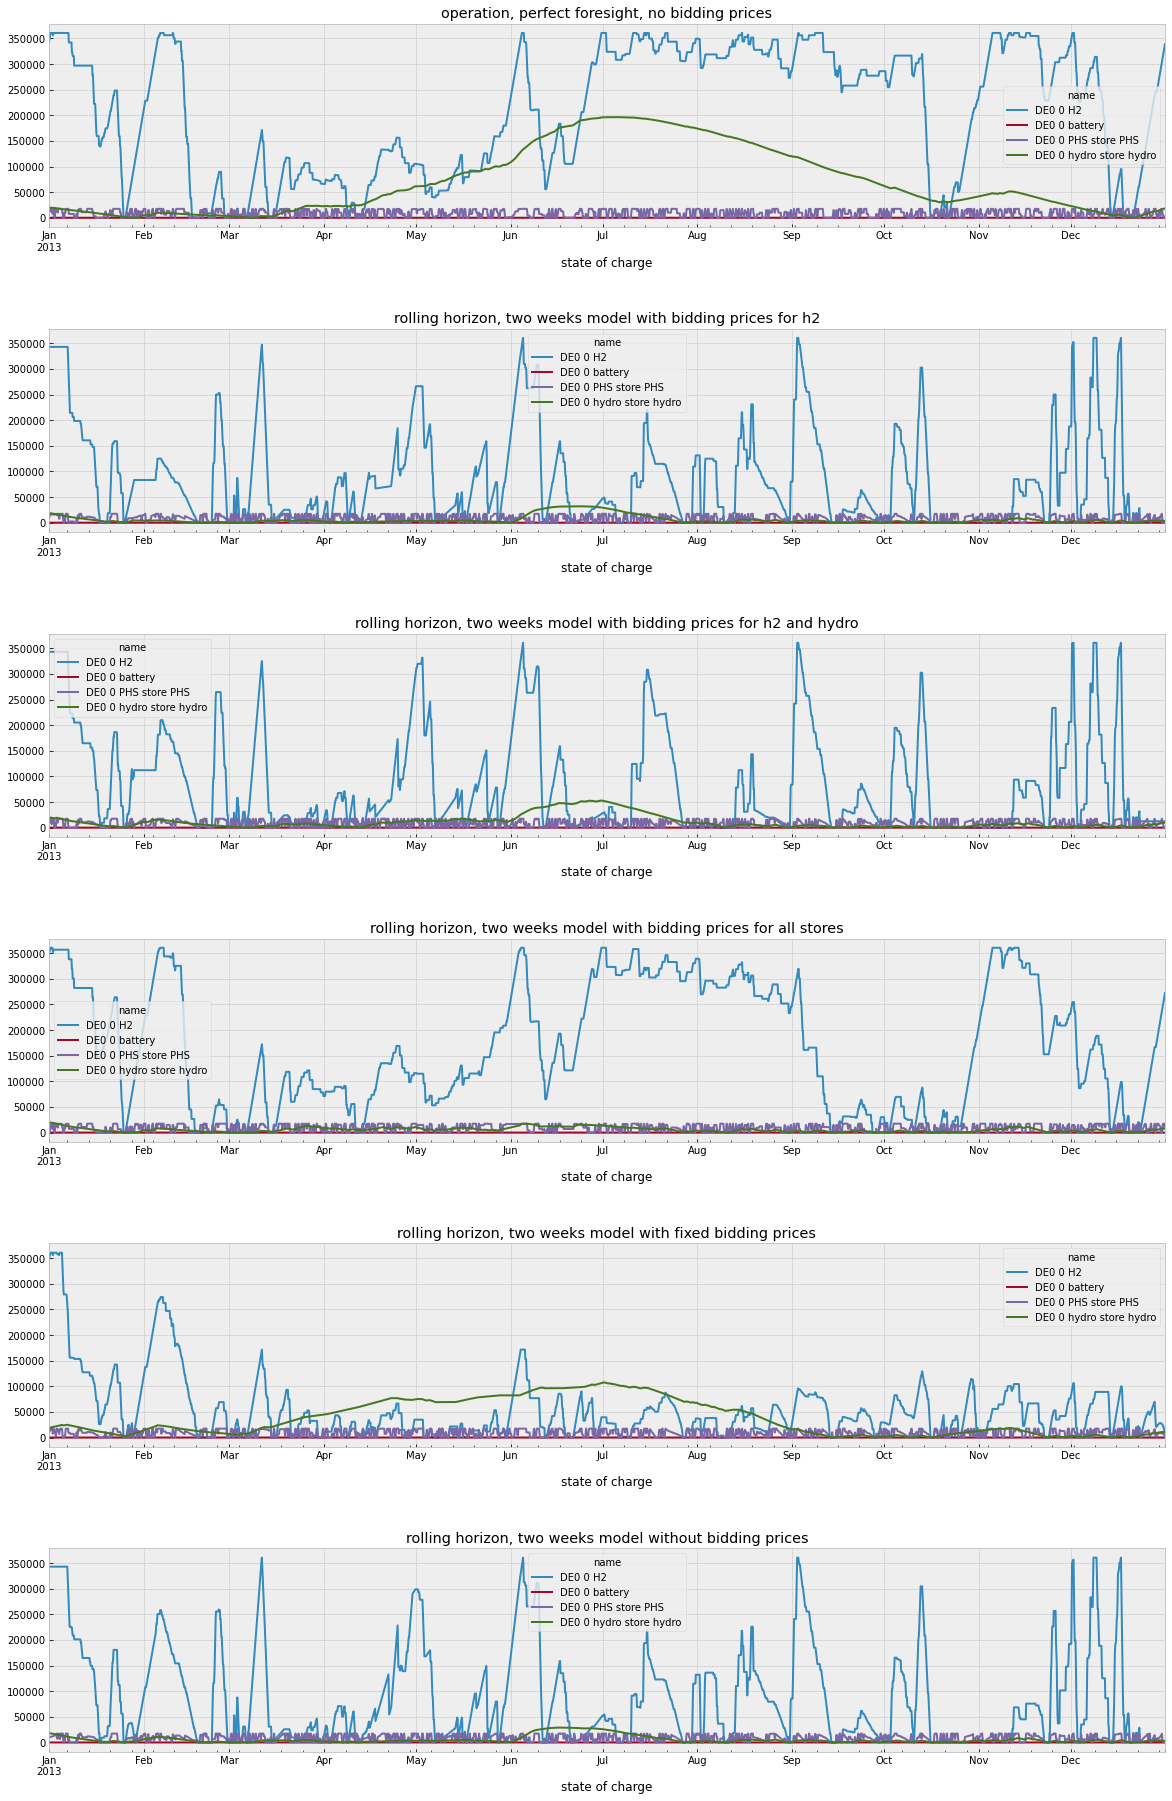

In [25]:
where='2013'

fig, (ax1,ax2,ax3,ax4,ax5, ax6) = plt.subplots(6,1, figsize=(20,30))
plt.subplots_adjust(top = 0.9, bottom=0.1, hspace=.5, wspace=0)

n_op.stores_t.e.filter(like='DE0 0').loc[where].plot(ax=ax1)
ax1.set_title('operation, perfect foresight, no bidding prices')
ax1.set_xlabel('state of charge')

n_rh_H2_2w.stores_t.e.filter(like='DE0 0').loc[where].plot(ax=ax2)
ax2.set_title('rolling horizon, two weeks model with bidding prices for h2')
ax2.set_xlabel('state of charge')

n_rh_H2andhydro_2w.stores_t.e.filter(like='DE0 0').loc[where].plot(ax=ax3)
ax3.set_title('rolling horizon, two weeks model with bidding prices for h2 and hydro')
ax3.set_xlabel('state of charge')

n_rh_all_2w.stores_t.e.filter(like='DE0 0').loc[where].plot(ax=ax4)
ax4.set_title('rolling horizon, two weeks model with bidding prices for all stores')
ax4.set_xlabel('state of charge')

n_rh_H2andhydro_2w_fixed_bidding.stores_t.e.filter(like='DE0 0').loc[where].plot(ax=ax5)
ax5.set_title('rolling horizon, two weeks model with fixed bidding prices')
ax5.set_xlabel('state of charge')

n_rh.stores_t.e.filter(like='DE0 0').loc[where].plot(ax=ax6)
ax6.set_title('rolling horizon, two weeks model without bidding prices')
ax6.set_xlabel('state of charge')


Text(0.5, 0, 'load shedding')

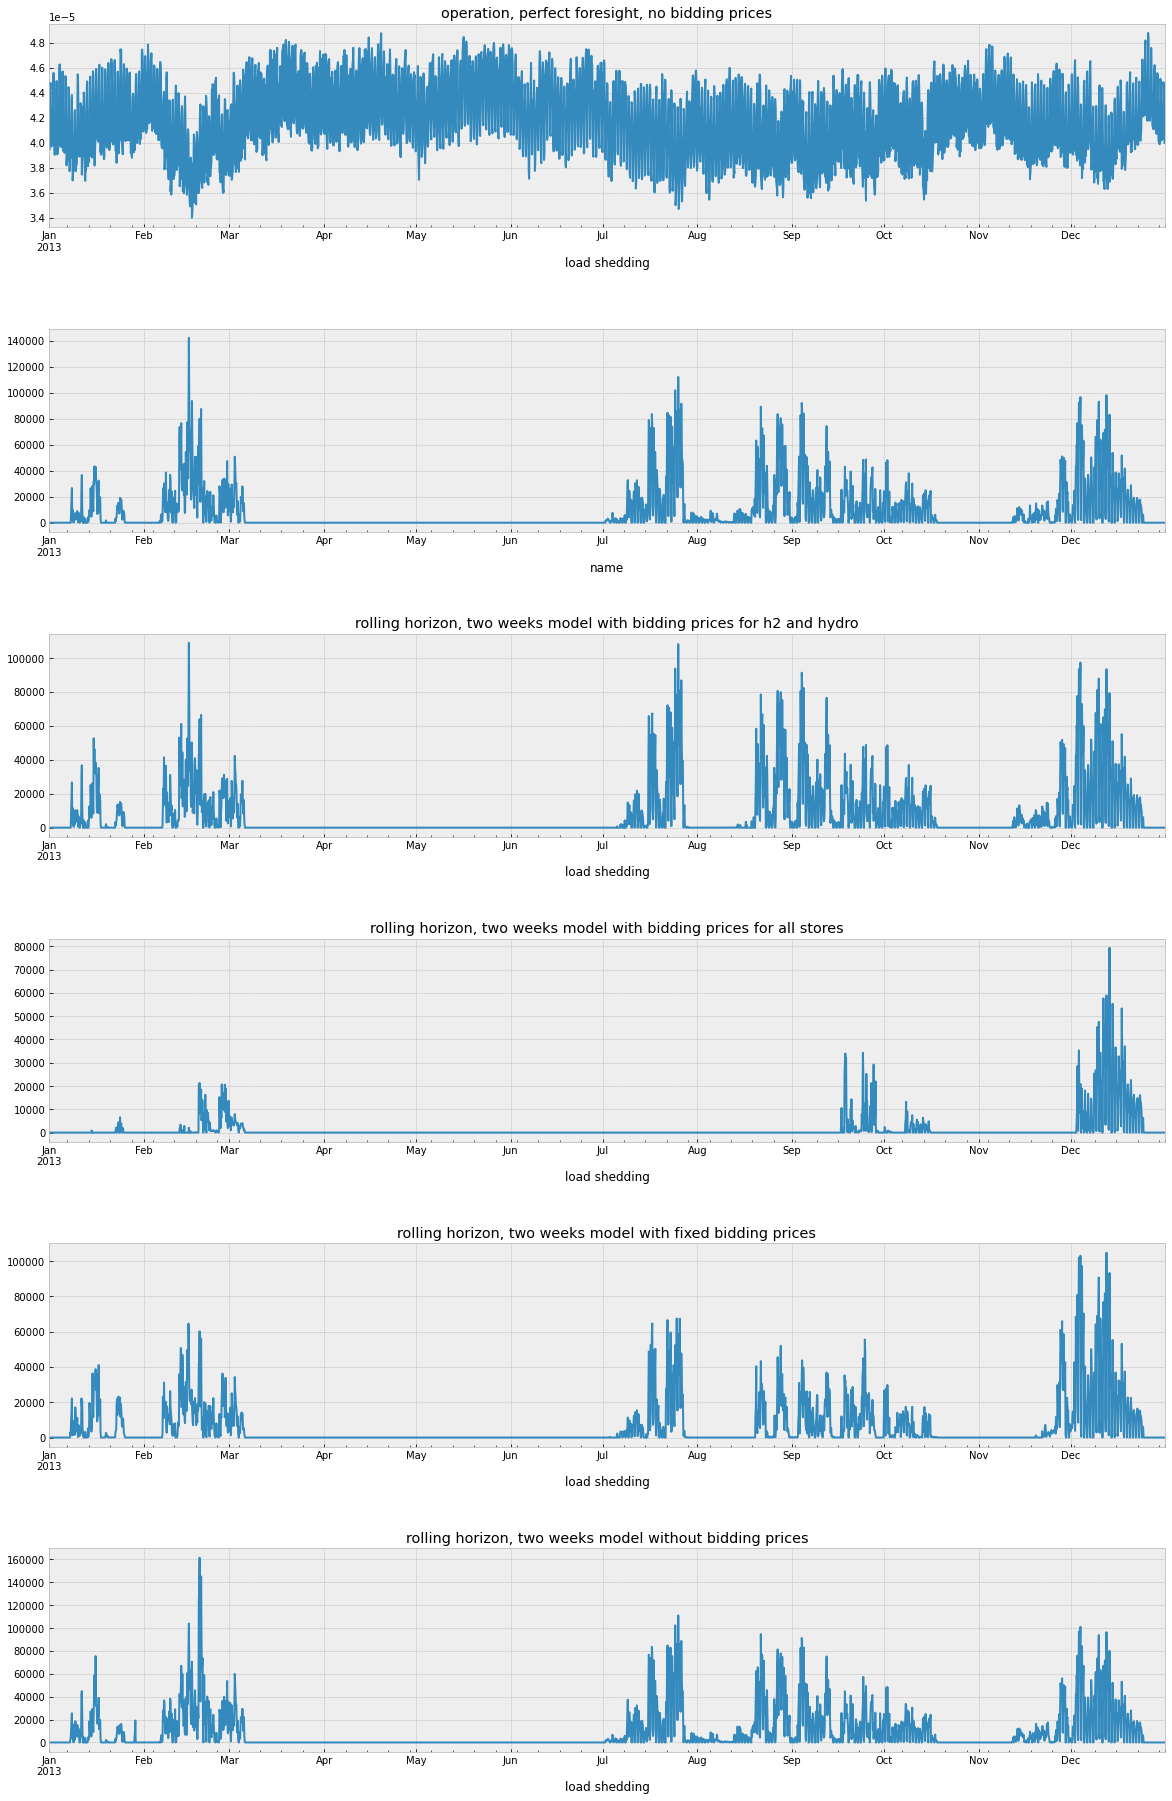

In [26]:
where='2013'

fig, (ax1,ax2,ax3,ax4,ax5, ax6) = plt.subplots(6,1, figsize=(20,30))
plt.subplots_adjust(top = 0.9, bottom=0.1, hspace=.5, wspace=0)

n=n_op
n.generators_t.p[n.generators.index[n.generators.carrier == "load"]].sum(axis=1).plot(ax=ax1)
ax1.set_title('operation, perfect foresight, no bidding prices')
ax1.set_xlabel('load shedding')


n=n_rh_H2_2w
n.generators_t.p[n.generators.index[n.generators.carrier == "load"]].sum(axis=1).plot(ax=ax2)
ax1.set_title('operation, perfect foresight, no bidding prices')
ax1.set_xlabel('load shedding')

n=n_rh_H2andhydro_2w
n.generators_t.p[n.generators.index[n.generators.carrier == "load"]].sum(axis=1).plot(ax=ax3)
ax3.set_title('rolling horizon, two weeks model with bidding prices for h2 and hydro')
ax3.set_xlabel('load shedding')

n=n_rh_all_2w
n.generators_t.p[n.generators.index[n.generators.carrier == "load"]].sum(axis=1).plot(ax=ax4)
ax4.set_title('rolling horizon, two weeks model with bidding prices for all stores')
ax4.set_xlabel('load shedding')


n = n_rh_H2andhydro_2w_fixed_bidding
n.generators_t.p[n.generators.index[n.generators.carrier == "load"]].sum(axis=1).plot(ax=ax5)
ax5.set_title('rolling horizon, two weeks model with fixed bidding prices')
ax5.set_xlabel('load shedding')

n=n_rh
n.generators_t.p[n.generators.index[n.generators.carrier == "load"]].sum(axis=1).plot(ax=ax6)
ax6.set_title('rolling horizon, two weeks model without bidding prices')
ax6.set_xlabel('load shedding')



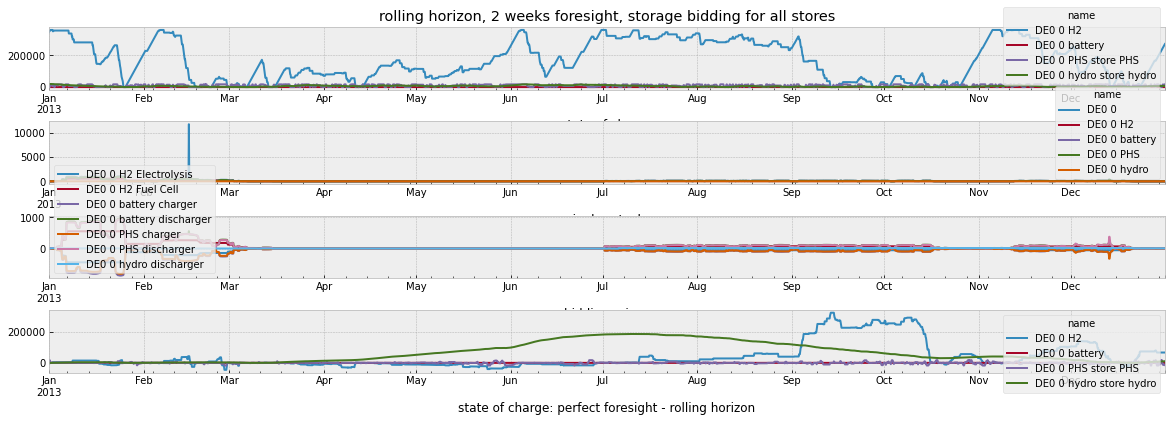

In [31]:
where='2013'

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(20,6))
plt.subplots_adjust(top = 0.9, bottom=0.1, hspace=.5, wspace=0)

n_rh_all_2w.stores_t.e.filter(like='DE0 0').loc[where].plot(ax=ax1)
ax1.set_title('rolling horizon, 2 weeks foresight, storage bidding for all stores')
ax1.set_xlabel('state of charge')

n_op.buses_t.marginal_price.filter(like='DE0 0').loc[where].plot(ax=ax2)
ax2.set_xlabel('marginal costs: buses')

n_rh_all_2w.links_t.marginal_cost.filter(like='DE0 0').loc[where].plot(ax=ax3)
ax3.set_xlabel('bidding prices')

(n_op.stores_t.e.filter(like='DE0 0')-n_rh_all_2w.stores_t.e.filter(like='DE0 0')).plot(ax=ax4)
ax4.set_xlabel('state of charge: perfect foresight - rolling horizon')

#fig.savefig(f'../plots/03-rh-h2.jpeg')
plt.show()

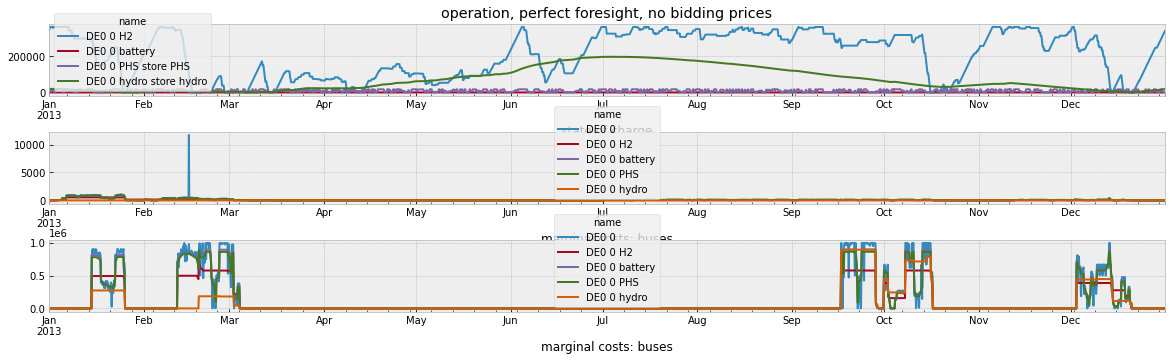

In [30]:
where='2013'

fig, (ax1,ax2, ax3) = plt.subplots(3,1, figsize=(20,5))
plt.subplots_adjust(top = 0.9, bottom=0.1, hspace=.5, wspace=0)

n_op.stores_t.e.filter(like='DE0 0').loc[where].plot(ax=ax1)
ax1.set_title('operation, perfect foresight, no bidding prices')
ax1.set_xlabel('state of charge')

n_op.buses_t.marginal_price.filter(like='DE0 0').loc[where].plot(ax=ax2)
ax2.set_xlabel('marginal costs: buses')

n_rh_all_2w.buses_t.marginal_price.filter(like='DE0 0').loc[where].plot(ax=ax3)
ax3.set_xlabel('marginal costs: buses')

#fig.savefig(f'../plots/01-operation.jpeg')
plt.show()

<AxesSubplot:xlabel='name'>

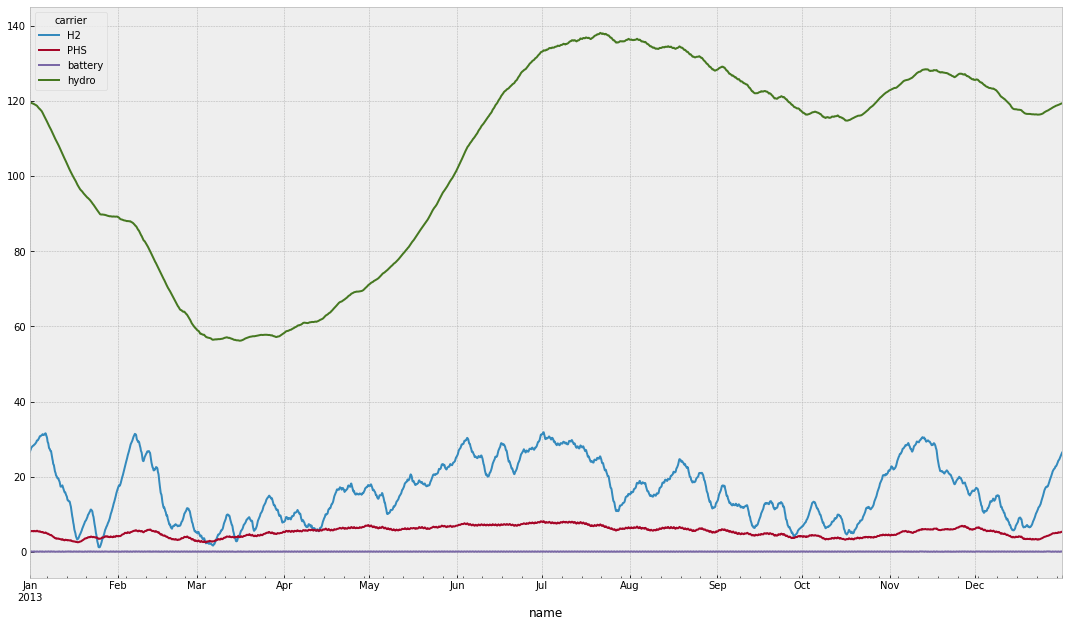

In [17]:
n = n_op

fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5, forward=True)

e = pd.concat((n.stores_t.e.groupby(n.stores.carrier,axis=1).sum(),
               n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier,axis=1).sum()),axis=1)

e = e/1e6
#e.drop(e.columns[e.abs().max() < 1e6],axis=1,inplace=True)

e.plot(ax=ax)

<AxesSubplot:xlabel='name'>

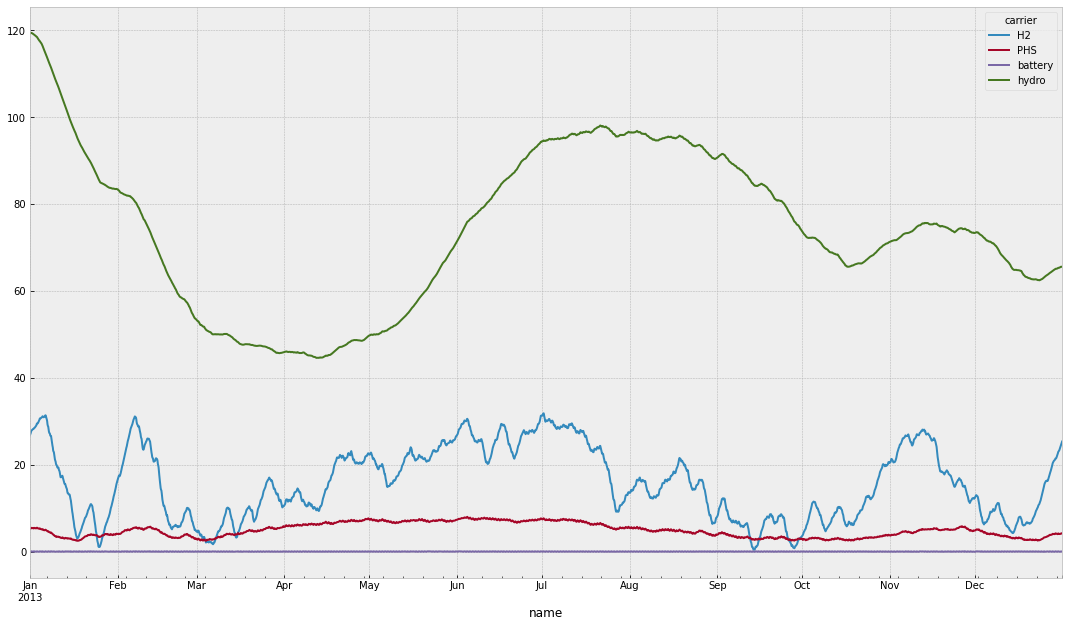

In [16]:
n = n_rh_all_2w

fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5, forward=True)

e = pd.concat((n.stores_t.e.groupby(n.stores.carrier,axis=1).sum(),
               n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier,axis=1).sum()),axis=1)

e = e/1e6
#e.drop(e.columns[e.abs().max() < 1e6],axis=1,inplace=True)

e.plot(ax=ax)

<AxesSubplot:xlabel='name'>

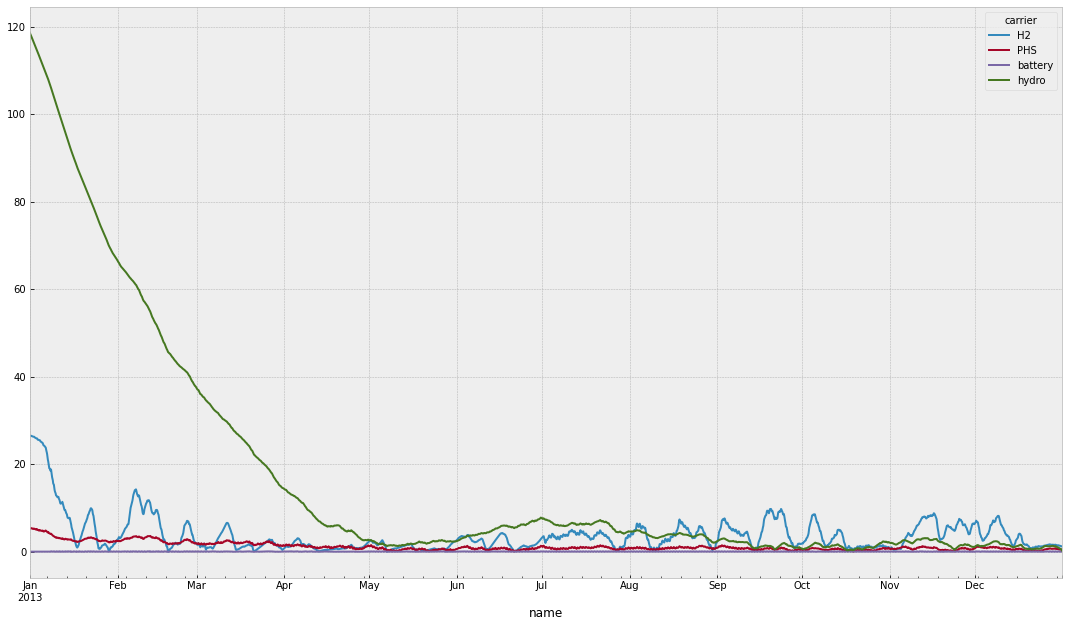

In [18]:
n = n_rh

fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5, forward=True)

e = pd.concat((n.stores_t.e.groupby(n.stores.carrier,axis=1).sum(),
               n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier,axis=1).sum()),axis=1)

e = e/1e6
#e.drop(e.columns[e.abs().max() < 1e6],axis=1,inplace=True)

e.plot(ax=ax)